# Analyzing Embeddings Accuracy

In [1]:
%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt

Parse the eval--.txt files (n the result folder) to extract the total accuracy of each model.

In [2]:
models_acc = {}
fldr = 'results-all/'
files = os.listdir(fldr)
for f in files:
    if f.startswith('eval') and f.endswith('.txt') and not f.startswith('eval1-imdb-') and not f.endswith('no-threshold.txt'):
        lines = open(fldr + f).readlines()
        for line in lines:
            if line.startswith('Questions seen / total:'):
                model_name = ''.join(f.split('-')[1:]).replace('.txt', '')
                results = line.split('total:')[-1].split()[:-1]
                models_acc[model_name] = results
                #print model_name, results

In [3]:
models_acc

{'googleNews': ['13190', '19544', '67.49'],
 'imdb': ['10505', '19544', '53.75'],
 'imdbtext8': ['12448', '19544', '63.69'],
 'text8': ['12268', '19544', '62.77']}

#### Convert as a dataframe

In [138]:
acc_df = pd.DataFrame.from_dict(models_acc, orient='index')
acc_df.columns = ['questions_seen','total_question','percentage_seen']
for c in acc_df:
    acc_df[c] = acc_df[c].apply(float)
del acc_df['total_question']
acc_df = acc_df.astype(float)
acc_df = acc_df.reindex(['googleNews', 'imdb', 'imdbtext8', 'text8'])

In [139]:
# questions seen
acc_df

,questions_seen,percentage_seen
googleNews,13190,67.49
imdb,10505,53.75
imdbtext8,12448,63.69
text8,12268,62.77


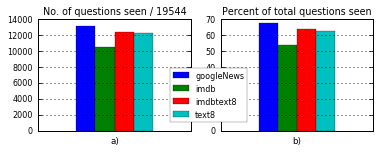

In [140]:
with plt.style.context(('seaborn-paper')):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 2))

    a = acc_df.T[:1].plot.bar(ax=axes[0], grid=True, legend=False, xticks=[], title='No. of questions seen / 19544')
    a.set_xlabel('a)')
    # a.set_ylim(0,20000)
    # a.set_ylabel('No. of question seen / 19544')
    

    b = acc_df.T[1:2].plot.bar(ax=axes[1], grid=True, xticks=[], title='Percent of total questions seen')
    b.set_xlabel('b)')
    # b.set_ylim(0,100)
    b.legend(bbox_to_anchor= (0.2,0.6))

    # b.set_ylabel('Accuracy %')
    fig.savefig('../w2v-eval/img/questions-seen.png', dpi=300)

In [ ]:
# ax = acc_df.T[:1].plot.bar(grid=True, xticks=[])
# ax.legend(bbox_to_anchor= (1.5,.2))
# ax.set_ylabel('Number of questions seen')

# bx = acc_df.T[2:3].plot.bar(grid=True, xticks=[])
# bx.legend(loc='best')
# bx.set_ylabel('Accuracy %')
# bx.legend_.remove()

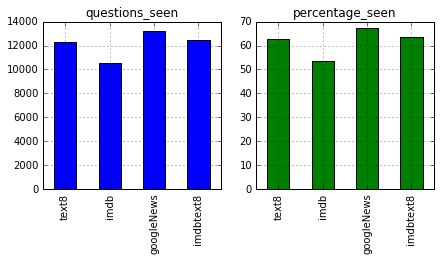

In [87]:
# ax = acc_df.plot.bar(subplots=True, legend=False, grid=True, figsize=(7,3), layout=(1,2))
# # plt.savefig('../w2v-eval/img/question-seen-threshold30K.png', dpi=300, bbox_inches='tight')

### append OVERALL accuracy 

In [132]:
acc_df['overall_acc'] = df.OVERALL

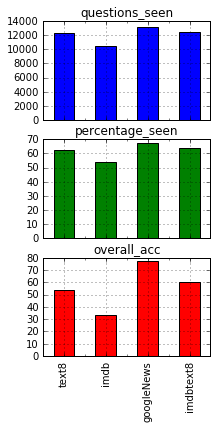

In [144]:
# ax = acc_df.plot.bar(subplots=True, legend=False, grid=True, layout=(3,1), figsize=(3,6))

In [237]:
# acc_df['questions_seen'].plot.bar(legend=False, grid=True, figsize=(3,3), layout=(1,1))
# # ax.set_xticklabels(df.index, rotation=60);pass
# acc_df['Total Accuracy'].plot.bar(legend=False, grid=True, figsize=(3,3), layout=(2,1))
# # ax.set_xticklabels(df.index, rotation=60);pass

---

Parse the detailed topic accuracy of each models

In [8]:
topics = ('capital-common-countries', 
          'capital-world',
          'city-in-state',
          'currency',
          'family',
          'gram1-adjective-to-adverb',
          'gram2-opposite',
          'gram3-comparative',
          'gram4-superlative',
          'gram5-present-participle',
          'gram6-nationality-adjective',
          'gram7-past-tense',
          'gram8-plural',
          'gram9-plural-verbs'
         )
len(topics)

14

In [9]:
accuracies = {}
fldr = 'results-all/'
files = os.listdir(fldr)

for f in files:
    if f.startswith('eval') and f.endswith('.txt'):# and not f.startswith('eval1-imdb-'):
        fname = fldr + f
        model_name = ''.join(f.split('-')[1:]).replace('.txt', '')
        accuracies[model_name] = {}
        with open(fname) as f:
            try:
                header = next(f)
            except StopIteration as e: 
                print "File is empty"
            for line in f:
                if line.startswith(topics):
                    topic = line.split(':')[0]
                  
                    # ACCURACY TOP1:
                    acc_top = next(f)
                    acc_top = acc_top.split(':')[-1]
                    acc_top = acc_top.split('%')
                    acc_top = [s.strip() for s in acc_top]
                    # Total accuracy
                    tot_acc = next(f)
                    tot_acc = tot_acc.split('Total accuracy:')[-1].split('%')[:-1]
                    tot_acc = [s.strip() for s in tot_acc]
                    
                    accuracies[model_name][topic] = acc_top, tot_acc


#### Collect {model: {topic: accuracy}

In [122]:
topic_accurcies = {}
for k, v in accuracies.items():
    topic_accurcies[k] = {}
    for kk, vv in v.items():
        topic_accurcies[k][kk] = vv[1][0]

#### Convert to a dataframe

In [133]:
df = pd.DataFrame.from_dict(topic_accurcies, orient='index')
# df columns to float
for c in df:
    df[c] = df[c].apply(float)

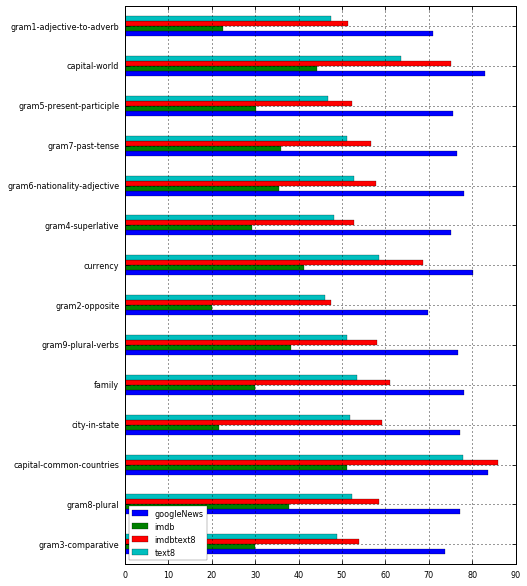

In [134]:
with plt.style.context(('seaborn-paper')):
    ax = df.T.plot.barh(figsize=(7,10), grid=True)
    ax.legend(loc='lower left')
#     plt.savefig('../w2v-eval/img/topics-accuracy-threshold30K-Stylish.png', dpi=300, bbox_inches='tight')

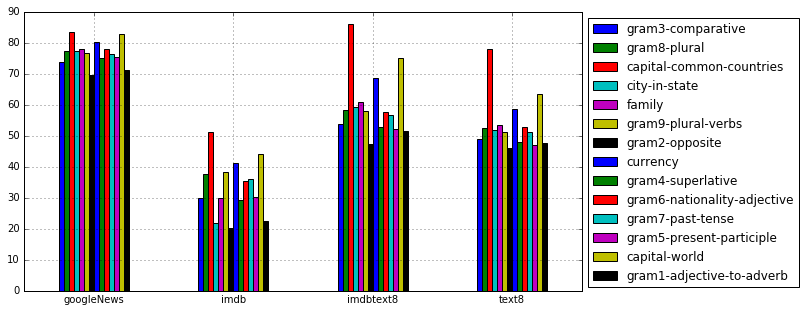

In [64]:
ax = df.plot.bar(figsize=(10,5), grid=True)
ax.legend(bbox_to_anchor=(1.4 ,1))
ax.set_xticklabels(list(df.index), rotation=0);pass
# plt.savefig('../w2v-eval/img/topics-accuracyByModel-threshold30K.png', dpi=300, bbox_inches='tight')

### Add OVERALL accuracy

In [14]:
import numpy as np
def comput_overall(df):
    return df.apply(np.sum, axis=1) / len(df.columns)

In [15]:
# add new columns (overall_acc) as the average accuracy of all topics for each model
df_overall = pd.DataFrame()
df_overall['OVERALL'] = np.round( comput_overall(df), decimals=2)

In [16]:
df_overall

,OVERALL
googleNews,76.85
imdb,33.41
imdbtext8,59.89
text8,53.60


---
# plots themes
---

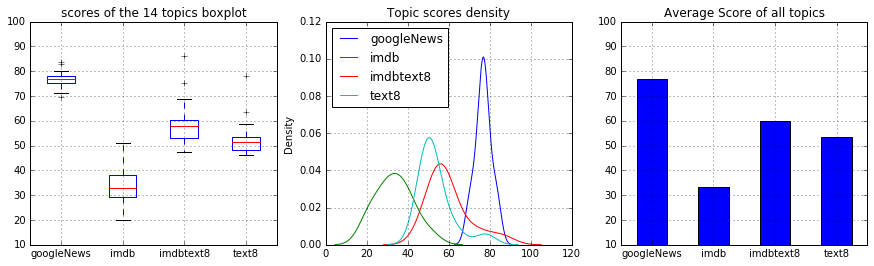

In [59]:

fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(15,4))

a = df.T.plot.box(ax=axes[0], title='scores of the 14 topics boxplot', grid=True)
a.set_ylim(10,100)

c = df.T.plot.density(ax=axes[1], title='Topic scores density', grid=True)

b = df_overall.plot.bar(ax=axes[2], legend=False, title='Average Score of all topics', grid=True)
b.set_ylim(10,100)
b.set_xticklabels(df_overall.index, rotation=0)

fig.savefig('../w2v-eval/img/word-anlaogy-overall.png', dpi=300)#, bbox_to_inch='tight')

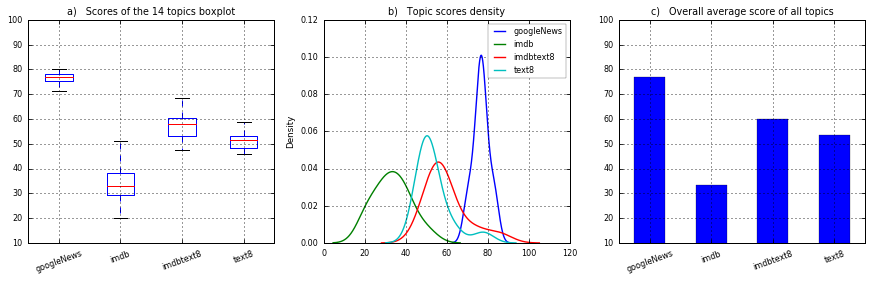

In [85]:

with plt.style.context(('seaborn-paper')):

    fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(15,4))

    a = df.T.plot.box(ax=axes[0], title='a)   Scores of the 14 topics boxplot', grid=True)
    a.set_ylim(10,100)
    a.set_xticklabels(df.index, rotation=20)

    c = df.T.plot.density(ax=axes[1], title='b)   Topic scores density', grid=True)

    b = df_overall.plot.bar(ax=axes[2], legend=False, title='c)   Overall average score of all topics', grid=True)
    b.set_ylim(10,100)
    b.set_xticklabels(df_overall.index, rotation=20)

    fig.savefig('../w2v-eval/img/word-anlaogy-overall.png', dpi=300)#, bbox_to_inch='tight')



Display scored accuracy for each topic 

In [33]:
print 'MODEL: ACCURACY'
print '\tSCORE TOPIC'
for k, v in topic_accurcies.items():
    print k+':',
    tot = sum([float(vv) for kk, vv in v.items()])
    tot = '{:.2f}'.format(tot / 14)
    print tot
    for k, v in v.items():
        print '\t', v, k

MODEL: ACCURACY
	SCORE TOPIC
text8: 53.60
	48.95 gram3-comparative
	52.40 gram8-plural
	77.87 capital-common-countries
	51.75 city-in-state
	53.47 family
	51.26 gram9-plural-verbs
	46.08 gram2-opposite
	58.63 currency
	48.16 gram4-superlative
	52.68 gram6-nationality-adjective
	51.17 gram7-past-tense
	46.90 gram5-present-participle
	63.59 capital-world
	47.56 gram1-adjective-to-adverb
imdb: 33.41
	29.94 gram3-comparative
	37.79 gram8-plural
	51.10 capital-common-countries
	21.72 city-in-state
	30.06 family
	38.20 gram9-plural-verbs
	20.12 gram2-opposite
	41.20 currency
	29.25 gram4-superlative
	35.39 gram6-nationality-adjective
	35.96 gram7-past-tense
	30.18 gram5-present-participle
	44.22 capital-world
	22.59 gram1-adjective-to-adverb
imdbtext8: 59.89
	53.85 gram3-comparative
	58.47 gram8-plural
	85.93 capital-common-countries
	59.15 city-in-state
	60.97 family
	57.98 gram9-plural-verbs
	47.45 gram2-opposite
	68.63 currency
	52.70 gram4-superlative
	57.74 gram6-nationality-adjective
	

#### Detailed accuracy (question seen and topic score)

In [34]:
print '\ttot-acc [top-acc, (seen/question)] topic'
for k, v in accuracies.items():
    print k
    for k, v in v.items():
        print '\t', v[1][0], v[0], '', k

	tot-acc [top-acc, (seen/question)] topic
text8
	48.95 ['60.71', '(765 / 1260)']  gram3-comparative
	52.40 ['65.62', '(651 / 992)']  gram8-plural
	77.87 ['77.87', '(394 / 506)']  capital-common-countries
	51.75 ['42.01', '(660 / 1571)']  city-in-state
	53.47 ['74.84', '(229 / 306)']  family
	51.26 ['30.92', '(201 / 650)']  gram9-plural-verbs
	46.08 ['22.55', '(69 / 306)']  gram2-opposite
	58.63 ['22.39', '(60 / 268)']  currency
	48.16 ['38.14', '(193 / 506)']  gram4-superlative
	52.68 ['86.07', '(1180 / 1371)']  gram6-nationality-adjective
	51.17 ['40.62', '(541 / 1332)']  gram7-past-tense
	46.90 ['38.10', '(378 / 992)']  gram5-present-participle
	63.59 ['58.61', '(851 / 1452)']  capital-world
	47.56 ['15.48', '(117 / 756)']  gram1-adjective-to-adverb
imdb
	29.94 ['54.13', '(721 / 1332)']  gram3-comparative
	37.79 ['54.13', '(537 / 992)']  gram8-plural
	51.10 ['51.10', '(139 / 272)']  capital-common-countries
	21.72 ['5.32', '(37 / 695)']  city-in-state
	30.06 ['55.48', '(233 / 420)'] 

# Analyzing Sentiment accuracy

In [35]:
import json
with open('sentiment-results.json', 'r') as handle:
    parsed_dict = json.load(handle)

In [36]:
# read result file
sent_df = pd.DataFrame.from_dict(parsed_dict)#, orient='index')

In [37]:
# parsing scores only (without pos / neg count)
score_dict = {}
for k, v in parsed_dict.items():
    print k
    score_dict[k] = {}
    for kk, vv in v.items():
        score_dict[k][kk] = vv[0]
        print '\t', kk, vv[0]

imdb-text8
	SGDClassifier 85.50%
	LinearSVC 89.12%
	Perceptron 80.11%
	LogisticRegressionCV 89.08%
	RandomForestClassifier 83.94%
imdb
	SGDClassifier 86.49%
	LinearSVC 89.20%
	Perceptron 84.29%
	LogisticRegressionCV 89.19%
	RandomForestClassifier 84.47%
text8
	SGDClassifier 75.44%
	LinearSVC 81.17%
	Perceptron 76.62%
	LogisticRegressionCV 81.22%
	RandomForestClassifier 74.26%
GoogleNews
	SGDClassifier 82.89%
	LinearSVC 86.14%
	Perceptron 78.94%
	LogisticRegressionCV 86.08%
	RandomForestClassifier 79.90%


In [38]:
# positive count only (without pos / neg count)
pos_dict = {}
for k, v in parsed_dict.items():
    pos_dict[k] = {}
    for kk, vv in v.items():
        pos_dict[k][kk] = vv[1]
# negative count only (without pos / neg count)
neg_dict = {}
for k, v in parsed_dict.items():
    neg_dict[k] = {}
    for kk, vv in v.items():
        neg_dict[k][kk] = vv[2]

In [39]:
# dataframe of CLASSIFIERS score
clf_df = pd.DataFrame.from_dict(score_dict)#, orient='index')

In [40]:
clf_df = clf_df.replace('%', '', regex=True) # remove % sign 
clf_df = clf_df.astype(float) # make dataframe numeric data 

In [41]:
clf_df

,GoogleNews,imdb,imdb-text8,text8
LinearSVC,86.14,89.20,89.12,81.17
LogisticRegressionCV,86.08,89.19,89.08,81.22
Perceptron,78.94,84.29,80.11,76.62
RandomForestClassifier,79.90,84.47,83.94,74.26
SGDClassifier,82.89,86.49,85.50,75.44


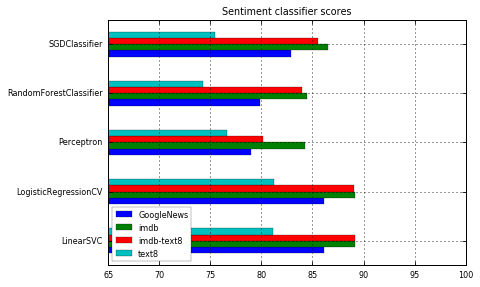

In [45]:
with plt.style.context(('seaborn-paper')):
    ax = clf_df.plot.barh(grid=True, title='Sentiment classifier scores', layout=(2,3))
    # ax.legend(bbox_to_anchor=(.4,.4))
    ax.legend(loc='lower left')
    ax.set_xlim(65,100)
    plt.savefig('../w2v-eval/img/sentiment-results', dpi=300, bbox_inches='tight')

# Putting all it Together

In [ ]:
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 7))
ab = acc_df.plot.bar(subplots=True, legend=False, grid=True, layout=(3,1), figsize=(3,6), title='Models accuracy in word analogy task')
ax = clf_df.plot.barh(grid=True, title='Sentiment classifier scores', layout=(2,3))
ax.legend(bbox_to_anchor=(.5,.5))
ax.set_xlim(0,100)


In [ ]:
# Add a plot for classification performance as a function of model type

Show three things together:

1. model accuracy
2. average retrieval error
3. sentiment results

---
















<br>
<br>
<br>
<br>
















<br>
<br>
<br>
<br>


---

--- 
# Scrap PLAYGROUND
<hr>
---

### Evaluating  IMDB Sentiment Analysis with w2v model

In [32]:
import sentiment as sen

In [33]:
sen.tokenize_data(['Hello workd 3 this <> no', 'sentim'])

[['hello', 'workd', 'this', 'no'], ['sentim']]

#### Retrieval-ERROR frequency

In [195]:
text8_ratio = retrieved_review_ratio

In [134]:
imdb_ratio = retrieved_review_ratio
imdb_difference = [r - f for r, f in imdb_ratio]

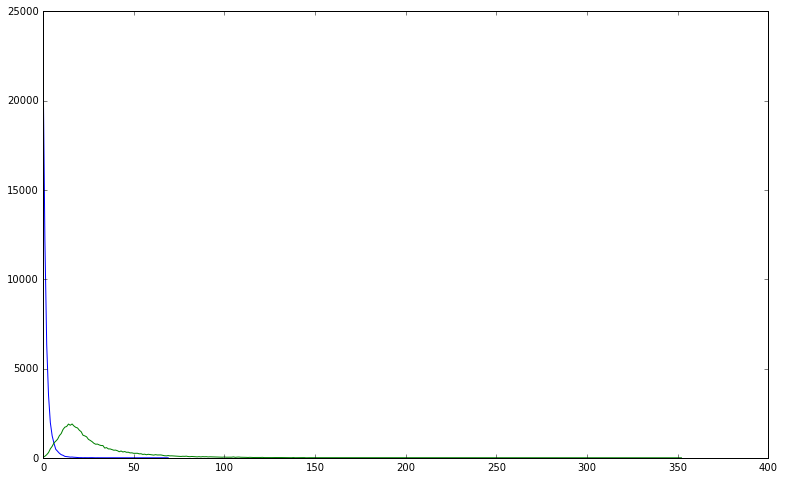

In [150]:
imdb_freq = Counter(imdb_difference)
x1, y1 = imdb_freq.keys(), imdb_freq.values()
plt.figure(figsize=(13,8))
plt.plot(x1, y1)
plt.plot(x, y) # google

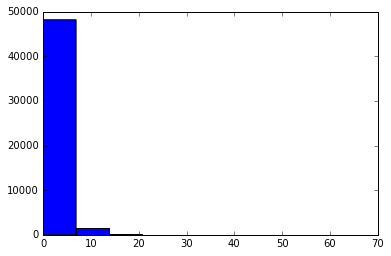

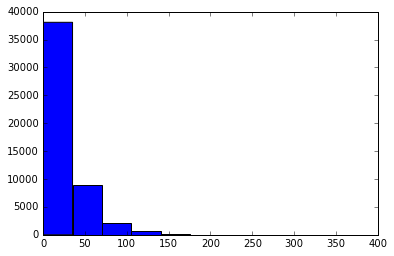

In [154]:
plt.hist(imdb_difference);plt.show()
plt.hist(google_difference);

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,6))
# df1.plot(ax=axes[0,0])
# df2.plot(ax=axes[0,1])
# df3.plot(ax=axes[1,0])
# df4.plot(ax=axes[1,1])
axes.plo

<Container object of 39 artists>

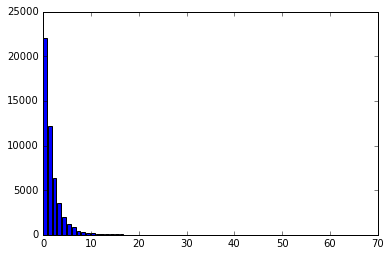

In [157]:
plt.bar(x1,y1)

In [203]:
differences = [r - f for r, f in retrieval_ratio]

In [122]:
# google_ratio = retrieved_review_ratio
google_difference = [r - f for r, f in google_ratio]

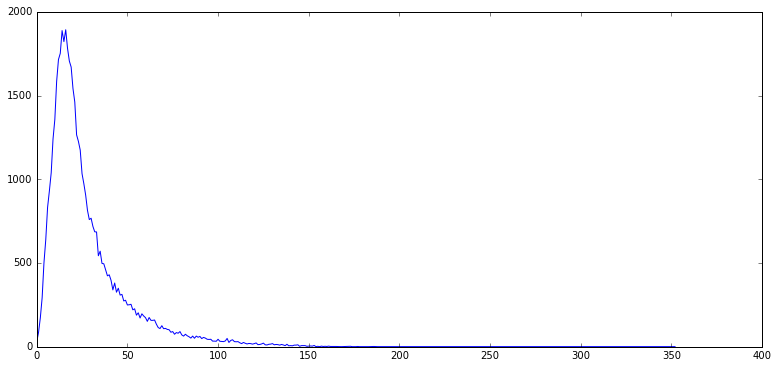

In [140]:
google_freq = Counter(google_difference)
x, y = google_freq.keys(), google_freq.values()
plt.figure(figsize=(13, 6))
plt.plot(x, y)

(array([  3.80830000e+04,   8.99400000e+03,   2.13000000e+03,
          6.50000000e+02,   1.23000000e+02,   1.20000000e+01,
          4.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          2.00000000e+00]),
 array([   0. ,   35.2,   70.4,  105.6,  140.8,  176. ,  211.2,  246.4,
         281.6,  316.8,  352. ]),
 <a list of 10 Patch objects>)

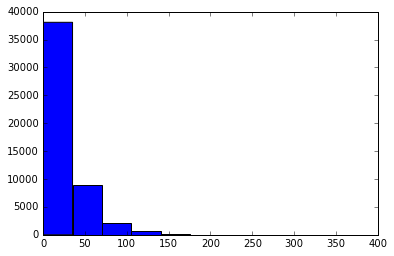

In [65]:
# GoogleNews
plt.hist(difference)

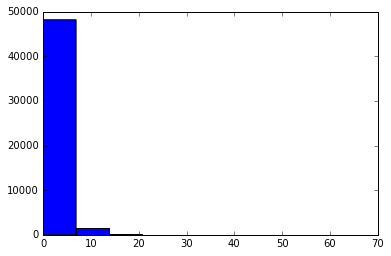

In [55]:
#IDMB 
plt.hist(difference);pass

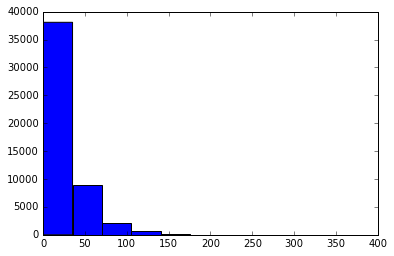

In [81]:
# GoogleNews
plt.hist(difference);pass

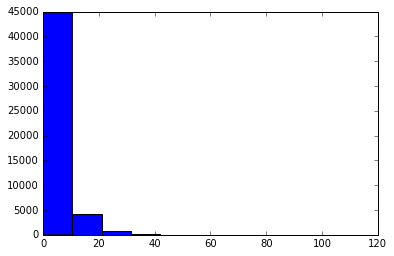

In [60]:
# text8
plt.hist(difference);pass

#### IMDB embeddings retrieval accuracy

In [98]:
imdb = df

In [105]:
freq = imdb.values


GOOGLE

In [1]:
%matplotlib inline

# Analazing Review Tokens Retrieval

In [1]:
%matplotlib inline

#### imdb_train.csv

In [2]:
import pandas as pd
im = pd.read_csv('results/ratio_imdb-train.csv', index_col=0)
db8 = pd.read_csv('results/ratio_imdb-text8-train.csv', index_col=0)
t8 = pd.read_csv('results/ratio_text8-train.csv', index_col=0)
g = pd.read_csv('results/ratio_GoogleNews-vectors-negative300.gz-train.csv', index_col=0)

In [3]:
# which col to choose and operation on them 
op = lambda c: c.sum()
qu = lambda df: df.num_review_tokens
found = lambda df: df.retrieved_vectors
mis = lambda df: df.missed

In [4]:
qur = pd.DataFrame([ op(qu(im)), op(qu(db8)), op(qu(t8)), op(qu(g))], columns=['queried'])

In [5]:
ret = pd.DataFrame([ op(found(im)), op(found(db8)), op(found(t8)), op(found(g))], columns=['retrieved'])

In [6]:
miss = pd.DataFrame([ op(mis(im)), op(mis(db8)), op(mis(t8)), op(mis(g))], columns=['missed'])

Number of reviews in imdb_train.csv

In [17]:
len(db8)

25000

Average number of tokens per review (all models are same)

In [15]:
qur.queried[0] / len(db8)

236

> ---
> Index-model mapping (for results below)
> 
> ```
> 0 imdb
> 1 imdb-text8
> 2 text8
> 3 googlNews
> ```
> ---

Average number of missed tokens (vocabulary not found) per review for each model.<br>
Lets call it: **Average Retrieval Error**

In [19]:
miss.missed / len(db8)

0     1.47204
1     0.99464
2     4.69884
3    28.37376
Name: missed, dtype: float64

Total tokens queried to each model (from all reviews)

In [28]:
qur

,queried
0,5920617
1,5920617
2,5920617
3,5920617


Total tokens retrieved from each model

,retrieved
0,5883816
1,5895751
2,5803146
3,5211273


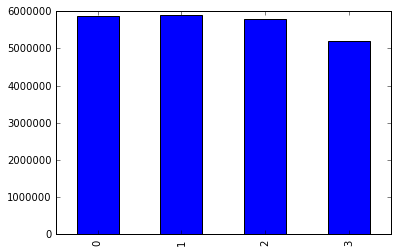

In [29]:
ret.plot.bar(legend=False)
ret

Total tokens missed (not found)

,missed
0,36801
1,24866
2,117471
3,709344


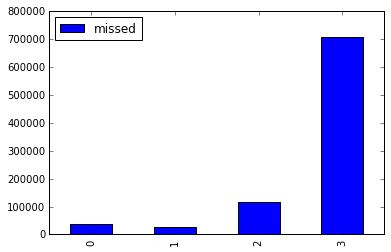

In [22]:
miss.plot.bar()
miss

In [126]:
len(set(g.num_review_tokens - g.retrieved_vectors))

177

Frequency of missed 

In [179]:
# m = pd.DataFrame([ mis(im), mis(db8), mis(t8), mis(g)])

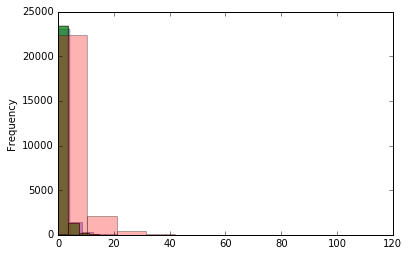

In [182]:
im.missed.plot.hist(alpha=0.3)
db8.missed.plot.hist(alpha=0.7)
t8.missed.plot.hist(alpha=0.3)
# ax = g.missed.plot.hist(title='GoogleNews', alpha=0.2)
ax.set_xlabel('number of tokens')

In [114]:
models = pd.DataFrame([qur.queried, ret.retrieved, miss.missed])
models.columns = ['imdb', 'imdb-text8', 'text8', 'google']

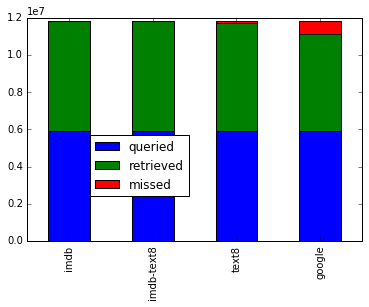

In [147]:
ax = models.T.plot.bar(stacked=True)
ax.legend(bbox_to_anchor=(0.5,0.5))

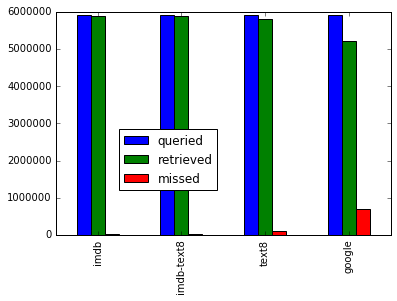

In [148]:
ax = models.T.plot.bar()
ax.legend(bbox_to_anchor = (0.5, 0.5))

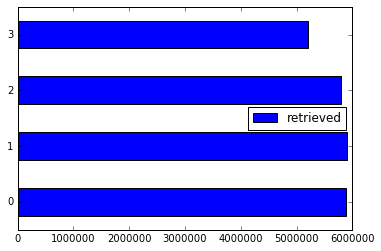

In [38]:
ret.plot.barh(stacked=True)

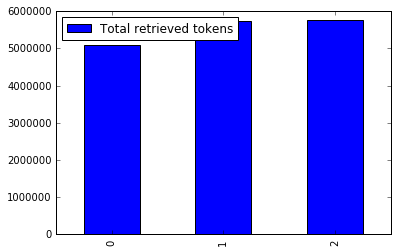

In [96]:
gsum = google.retrieved_vectors.sum()
isum = imdb.retrieved_vectors.sum()
tsum = test8.retrieved_vectors.sum()
sums = pd.DataFrame([gsum,isum, tsum], columns=['Total retrieved tokens'])
sums.plot(kind='bar')

In [ ]:
totals = (itot, gtot, ttot)
retrieves = (isum, gsum, tsum)
fig, ax = plt.subplots()
rect1 = ax.bar(ind, retrieves, width, color='r')#, yerr=menStd)
rect2 = ax.bar(ind + 0.1, totals, width, color='b')#, yerr=menStd)
ax.legend(('retrieved vectors', 'review tokens'), bbox_to_anchor = (1, 0.5))
ax.set_xticks(ind + width)
ax.set_xticklabels(('IMDB', 'GoogleNews', 'text8'))
plt.grid()
plt.show()

In [5]:
# google[['missed']].plot()

In [17]:
import numpy as np

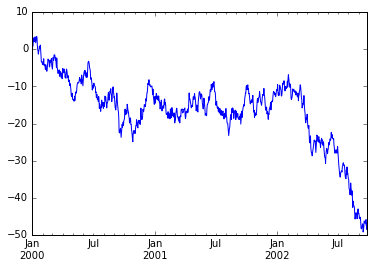

In [26]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

In [54]:
tk = pd.Series(google.num_review_tokens)
tk = tk.cummin()
tk[:3]

0    153
1    153
2    153
Name: num_review_tokens, dtype: int64

In [98]:
# g = google.describe()
# db = imdb.describe()
# g.plot()
# db.plot()

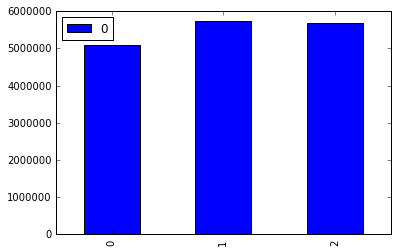

In [87]:
sums = pd.DataFrame([gsum,isum,tsum])
sums.plot(kind='bar')

5750039

5672869

In [58]:
tokens = google.num_review_tokens

In [22]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))

In [15]:
google.num_review_tokens.sum()

5786346

In [11]:
google.retrieved_vectors.sum()

5093703

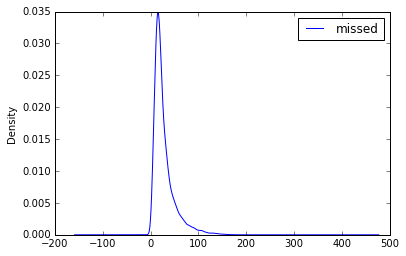

In [10]:
ax = google[['missed']].plot(kind='density')

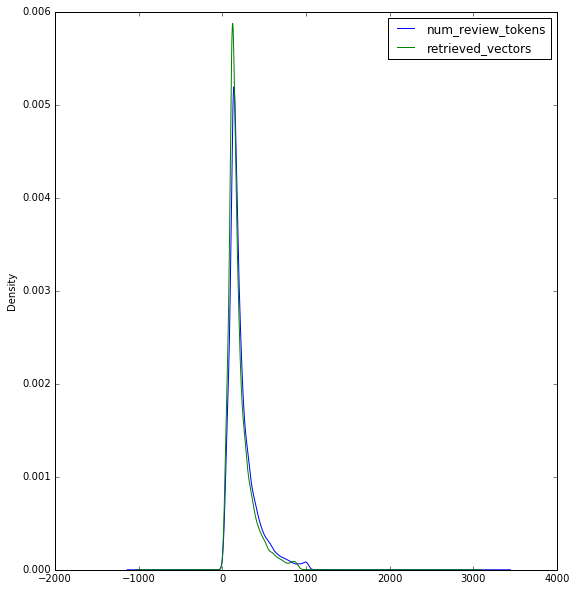

In [13]:
google[['num_review_tokens','retrieved_vectors']].plot(kind='density', figsize=(9,10))

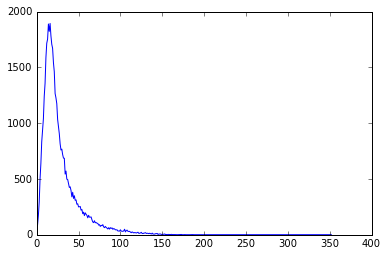

In [82]:
from collections import Counter
google_ratio = Counter(difference)
x, y = google_ratio.keys(), google_ratio.values()
plt.plot(x, y)

In [188]:
google_df = pd.DataFrame(google_ratio, columns=['review_tokens','retrieved_vectors'])
google_df['missed'] = google_df.review_tokens - google_df.retrieved_vectors
google_df.to_csv('ratio_google.csv')

In [190]:
imdb_df = pd.DataFrame(imdb_ratio, columns=['review_tokens','retrieved_vectors'])
imdb_df['missed'] = imdb_df.review_tokens - imdb_df.retrieved_vectors
imdb_df.to_csv('ratio_imdb.csv')

In [196]:
text8_df = pd.DataFrame(text8_ratio, columns=['review_tokens','retrieved_vectors'])
text8_df['missed'] = text8_df.review_tokens - text8_df.retrieved_vectors
text8_df.to_csv('ratio_text8.csv')

## Average Error Factor

    Average retrieval error = 
$$\frac{ \sum_{i=1}^n{missed\_vectors_i} } { n }$$

    in other words:

$$\frac{ \sum_{i=1}^{n}({tokens_i - retrieved_i})}{ n }$$

where, 

$tokens$: the total number of tokens in all reviews.<br>
$retrieved$: the total number of retrieved vectors for all reviews.<br>
$n$: the total number of reviews.

In [156]:
def average_error(tokens, retrieve, n=5000):
    err = (sum(tokens) - sum(retrieve)) / 50000.
    return float('{:.4f}'.format(err))

In [157]:
average_error(df_google.review_tokens, df_google.retrieved_vectors)

28.0397

In [158]:
average_error(df_imdb.review_tokens, df_imdb.retrieved_vectors)

1.4622

In [160]:
average_error(df_text8.review_tokens, df_text8.retrieved_vectors)

4.619

In [191]:
float(google_df.missed.sum()) / len(google_df.index)

28.03974

In [193]:
float(imdb_df.missed.sum()) / len(imdb_df)

1.46216

In [197]:
float(text8_df.missed.sum()) / len(text8_df)

4.61896

In [139]:
# token per review
df_imdb.review_tokens.sum()/float(len(df_imdb))

234.13926000000001

In [140]:
# token per review
df_google.review_tokens.sum()/float(len(df_google))

234.13926000000001

In [143]:
(df_imdb.review_tokens.sum() - df_imdb.retrieved_vectors.sum()) / float(len(df_imdb))

1.4621599999999999

In [ ]:
# plotting average retrieval

In [9]:
import pandas as pd

In [32]:
df_imdb = pd.read_csv('logs/ratio_imdb.csv', index_col=None)
del df_imdb['Unnamed: 0']

In [33]:
df_google = pd.read_csv('logs/ratio_google.csv', index_col=None)
del df_google['Unnamed: 0']

In [91]:
df_text8 = pd.read_csv('logs/ratio_text8.csv', index_col=None)
del df_text8['Unnamed: 0']

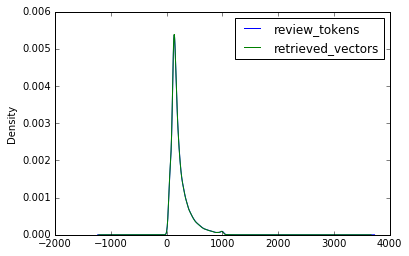

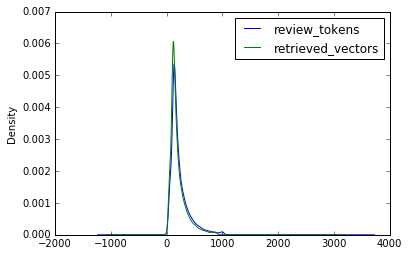

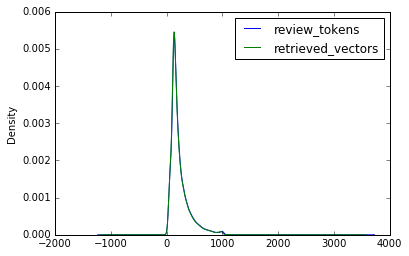

In [92]:
plot_error(df_imdb)
plot_error(df_google)
plot_error(df_text8)

In [25]:
def plot_error(df):
    df[['review_tokens', 'retrieved_vectors']].plot(kind='density')

In [93]:
gsum = sum(df_google.retrieved_vectors)
isum = sum(df_imdb.retrieved_vectors)
tsum = sum(df_text8.retrieved_vectors)

In [94]:
gtot = sum(df_google.review_tokens)
itot = sum(df_imdb.review_tokens)
ttot = sum(df_text8.review_tokens)

In [95]:
ind = np.arange(3)
width = 0.1

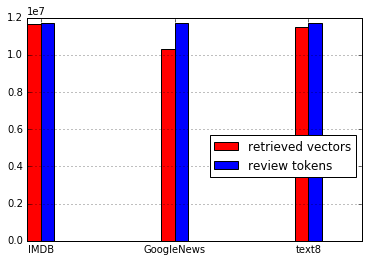

In [131]:
totals = (itot, gtot, ttot)
retrieves = (isum, gsum, tsum)
fig, ax = plt.subplots()
rect1 = ax.bar(ind, retrieves, width, color='r')#, yerr=menStd)
rect2 = ax.bar(ind + 0.1, totals, width, color='b')#, yerr=menStd)
ax.legend(('retrieved vectors', 'review tokens'), bbox_to_anchor = (1, 0.5))
ax.set_xticks(ind + width)
ax.set_xticklabels(('IMDB', 'GoogleNews', 'text8'))
plt.grid()
plt.show()